In [1]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('HOG/test/test.jpg') #20171118_130335.jpg'
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

(<matplotlib.axes._subplots.AxesSubplot at 0x18f5207d588>,
 <matplotlib.text.Text at 0x18f520eff28>)

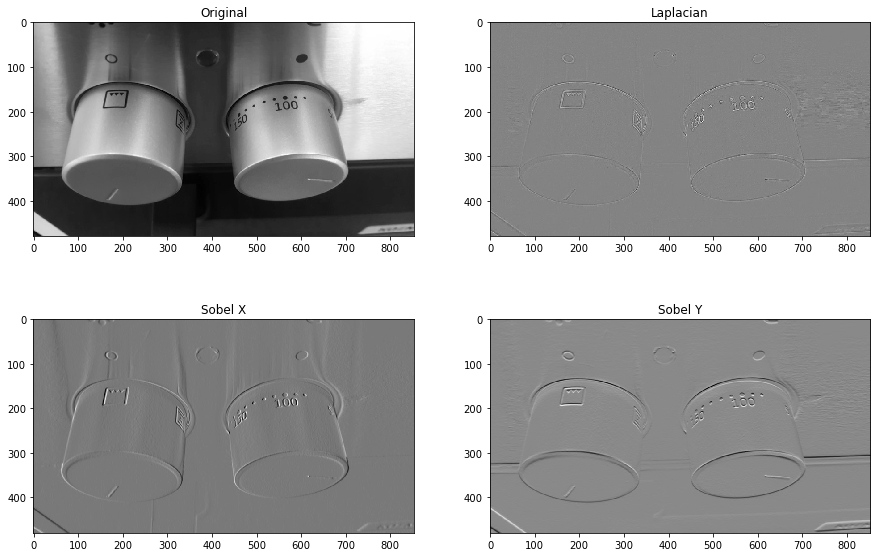

In [10]:
laplacian = cv2.Laplacian(gray,cv2.CV_64F)
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=3)

plt.figure(figsize = (15,10))
plt.subplot(2,2,1),plt.imshow(gray,cmap = 'gray'),plt.title('Original')
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray'),plt.title('Laplacian')
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray'),plt.title('Sobel X')
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray'),plt.title('Sobel Y')

# => best: sobel y, depend on perspective ...

(<matplotlib.axes._subplots.AxesSubplot at 0x18f5338df60>,
 <matplotlib.text.Text at 0x18f534225c0>)

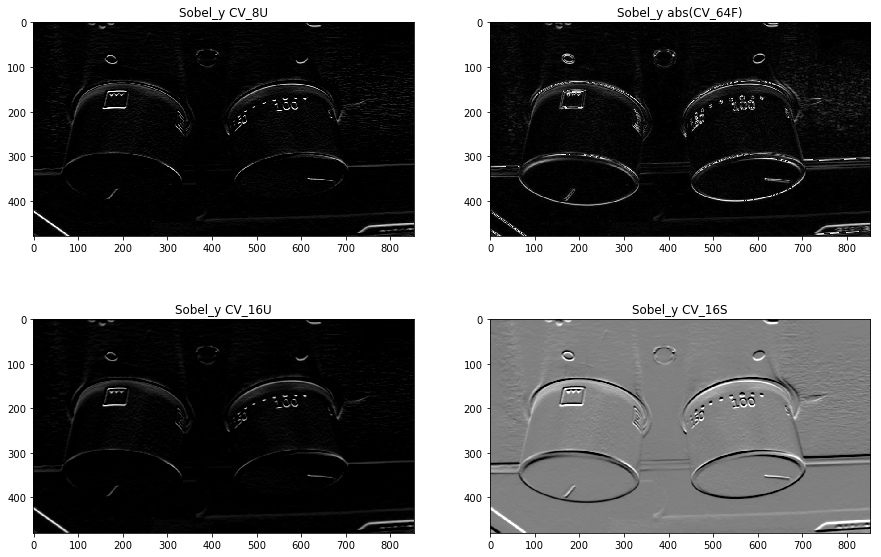

In [12]:
# If you want to detect both edges, 
# better option is to keep the output datatype to some higher forms, 
# like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U
# take sobel y

# size of 5
#sobely8u = cv2.Sobel(gray,cv2.CV_8U,0,1,ksize=5)
#sobely16u = cv2.Sobel(gray,cv2.CV_16U,0,1,ksize=5)
#sobely16s = cv2.Sobel(gray,cv2.CV_16S,0,1,ksize=5)

#abs_sobel64f = np.absolute(sobely)
#sobel_8u = np.uint8(abs_sobel64f)

# other size
sobely8u = cv2.Sobel(gray,cv2.CV_8U,0,1,ksize=3)
sobely16u = cv2.Sobel(gray,cv2.CV_16U,0,1,ksize=7)
sobely16s = cv2.Sobel(gray,cv2.CV_16S,0,1,ksize=7)

abs_sobel64f = np.absolute(sobely)
sobel_8u = np.uint8(abs_sobel64f)


plt.figure(figsize = (15,10))
plt.subplot(2,2,1),plt.imshow(sobely8u,cmap = 'gray'),plt.title('Sobel_y CV_8U')
plt.subplot(2,2,2),plt.imshow(sobel_8u,cmap = 'gray'),plt.title('Sobel_y abs(CV_64F)')
plt.subplot(2,2,3),plt.imshow(sobely16u,cmap = 'gray'),plt.title('Sobel_y CV_16U')
plt.subplot(2,2,4),plt.imshow(sobely16s,cmap = 'gray'),plt.title('Sobel_y CV_16S')

(<matplotlib.axes._subplots.AxesSubplot at 0x18f525eb080>,
 <matplotlib.text.Text at 0x18f56562828>)

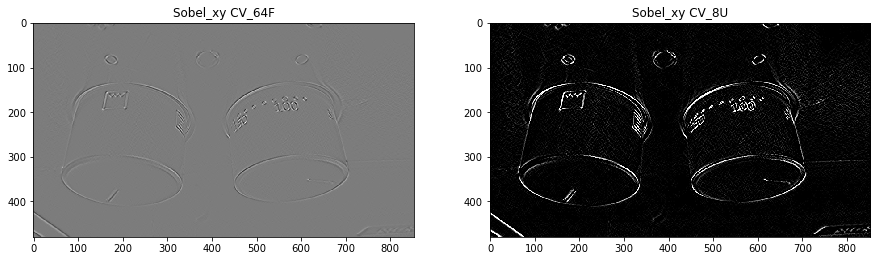

In [15]:
# test sobel in both derivations: first x, then y derivation
#cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) → dst
sobelxy = cv2.Sobel(gray,cv2.CV_64F,1,1,ksize=5)
sobelxy8u = cv2.Sobel(gray,cv2.CV_8U,1,1,ksize=5)

plt.figure(figsize = (15,10))
plt.subplot(1,2,1),plt.imshow(sobelxy,cmap = 'gray'),plt.title('Sobel_xy CV_64F')
plt.subplot(1,2,2),plt.imshow(sobelxy8u,cmap = 'gray'),plt.title('Sobel_xy CV_8U')

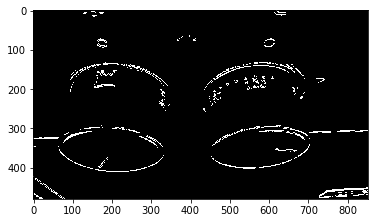

In [17]:
# manual binarize sobel8u
bin_sobel_8u = np.zeros(sobel_8u.shape)
bin_sobel_8u[sobel_8u < 75] = 0
bin_sobel_8u[sobel_8u >= 75] = 255

plt.imshow(bin_sobel_8u, cmap="gray")

In [18]:
# execute edge detection canny on images:

#edges = cv2.Canny(sobely8u, 10, 500 , apertureSize = 3)
#edges = cv2.Canny(sobel_8u, 75, 75, apertureSize = 3)
#edges = imutils.auto_canny(sobely8u)
#edges = imutils.auto_canny(sobelxy8u)